In [5]:
import h5py
import numpy as np
from pathlib import Path
from typing import Dict,List

In [4]:
a=[{'c':[1],'b':[1,2,3]},{'c':[1],'b':[1,2,3]},{'c':[1],'b':[1,2,3]},{'c':[1],'b':[1,2,3]}]

In [8]:
def to_python_hdf5(dat:List, save_path: Path):
    """Save data in hdf5 format."""
    # save the data
    with h5py.File(save_path, "w") as f:
        for i_d in range(len(dat)):
            group = f.create_group(str(i_d))

            for key, value in zip(dat[i_d].keys(), dat[i_d].values()):
                group.create_dataset(key, np.array(value).shape, data=value)
    f.close()

In [14]:
def from_python_hdf5(load_path: Path):
    """Load data from a file in hdf5 format from Python."""
    with h5py.File(load_path, "r") as f:
        data = []
        for i_g in f.keys():
            group = f[i_g]
            dataset={}
            for key, value in zip(group.keys(), group.values()):
                dataset[key] = np.array(value)
            data.append(dataset)
    f.close()
    return data

In [9]:
to_python_hdf5(dat=a, save_path='./test')

In [1]:
from ephysvibe.structures.neuron_data import NeuronData
import numpy as np
from itertools import combinations
from ephysvibe.trials import align_trials
import hoi
import os
import glob
import matplotlib.pyplot as plt 

c:\Users\camil\.conda\envs\Ephys\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
directory="//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/pfc/neurons/2023-03-09_10-35-09_Riesling_pfc_e1_r1_good"
rf_path_b1 = os.path.normpath(directory + "*")
rf_path_b1 = glob.glob(rf_path_b1, recursive=True)

In [3]:
time_before=100

In [5]:
all_neurons = []
trial_sample = []
for n_path in rf_path_b1:
    neu_data = NeuronData.from_python_hdf5(n_path)
    neuron,mask_neu = sp_sample_on_in,mask_in = align_trials.align_on(
        sp_samples=neu_data.sp_samples,
        code_samples=neu_data.code_samples,
        code_numbers=neu_data.code_numbers,
        trial_error=neu_data.trial_error,
        block=neu_data.block,
        pos_code=neu_data.pos_code,
        select_block= 1,
        select_pos= 1,
        event ="sample_on",
        time_before = time_before,
        error_type= 0,
    )
    neuron=neuron[:,:1000]
    neuron=neuron[:,np.newaxis]
    all_neurons.append(neuron)


In [ ]:
all_neurons[0]

In [6]:
all_neurons=np.concatenate(all_neurons,axis=1)
all_neurons.shape

(417, 20, 1000)

In [7]:
sample_id=neu_data.sample_id[mask_neu].astype(int)
mask = np.where(sample_id==0,False,True)

In [8]:
x = all_neurons[mask]
y = sample_id[mask]

In [33]:
x.shape

(349, 20, 1000)

In [37]:
hoi_res = hoi.metrics.GradientOinfo(x[:,:,:600].astype(int),y)
res = hoi_res.fit(minsize=3, maxsize=4,method='binning')

Get list of multiplets
Get list of multiplets                                     


In [38]:

hoi_res_oinfo = hoi.metrics.Oinfo(x[:,:,:600].astype(int))
res_oinfo = hoi_res_oinfo.fit(minsize=3, maxsize=4,method='binning')

Get list of multiplets


In [39]:
res.shape

(5985, 600)

In [44]:
np.where(hoi_res.multiplets[:,-1]==-1)

(array([   0,    1,    2, ..., 1137, 1138, 1139], dtype=int64),)

In [42]:
hoi_res.multiplets[119:125]

array([[ 0,  9, 13, -1],
       [ 0,  9, 14, -1],
       [ 0,  9, 15, -1],
       [ 0,  9, 16, -1],
       [ 0,  9, 17, -1],
       [ 0,  9, 18, -1]])

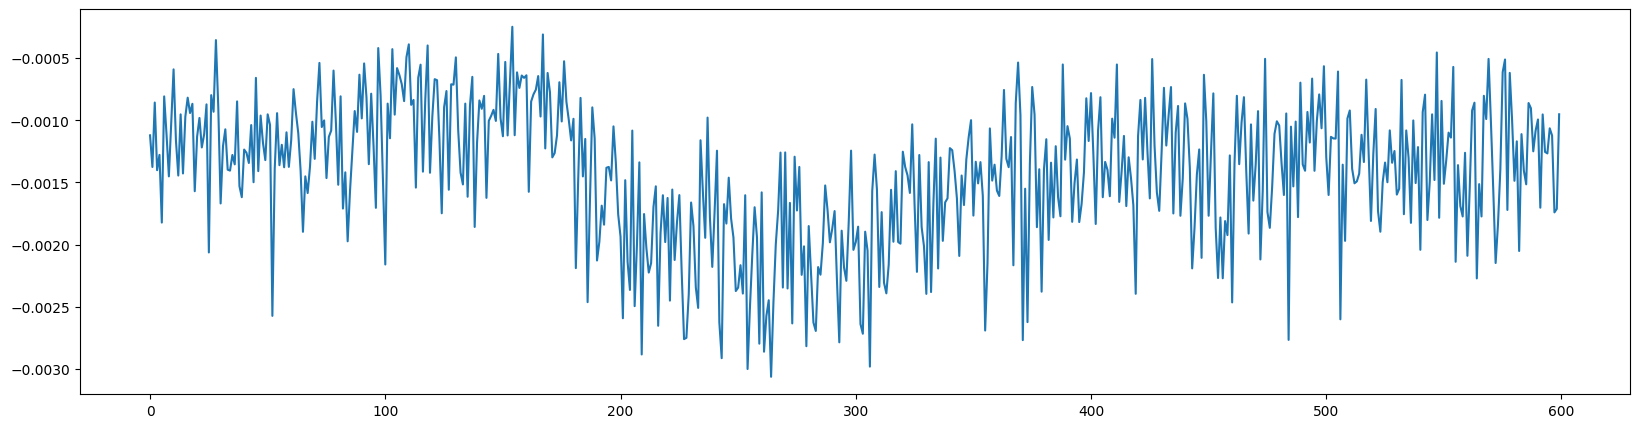

In [45]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res[:1139].mean(axis=0))

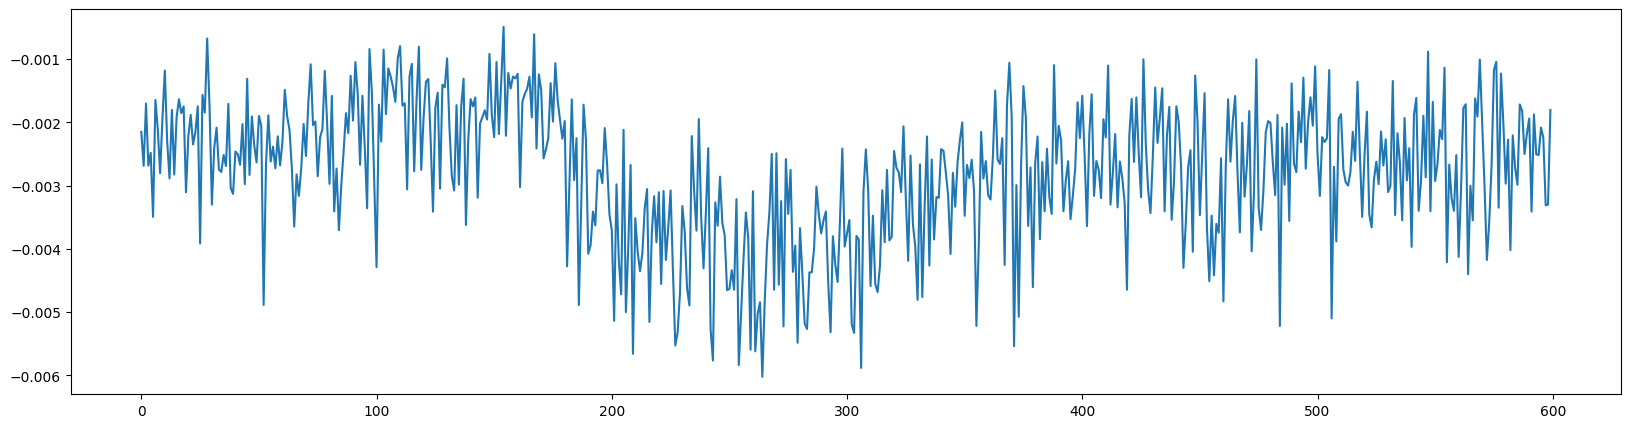

In [46]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res[1139:].mean(axis=0))

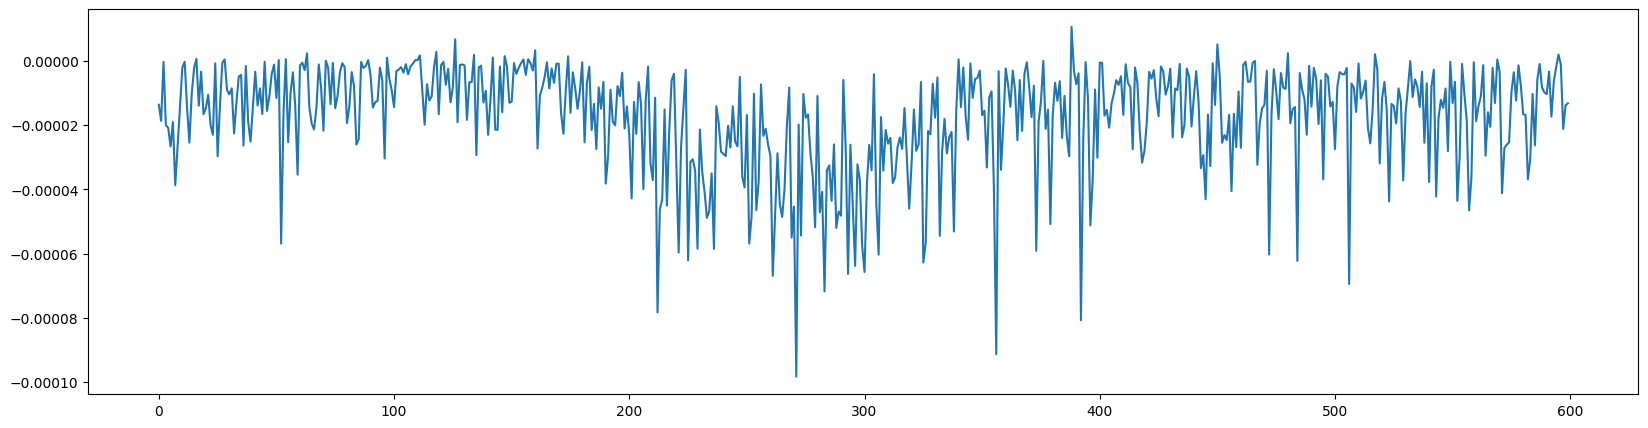

In [48]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res_oinfo[:1139].mean(axis=0))

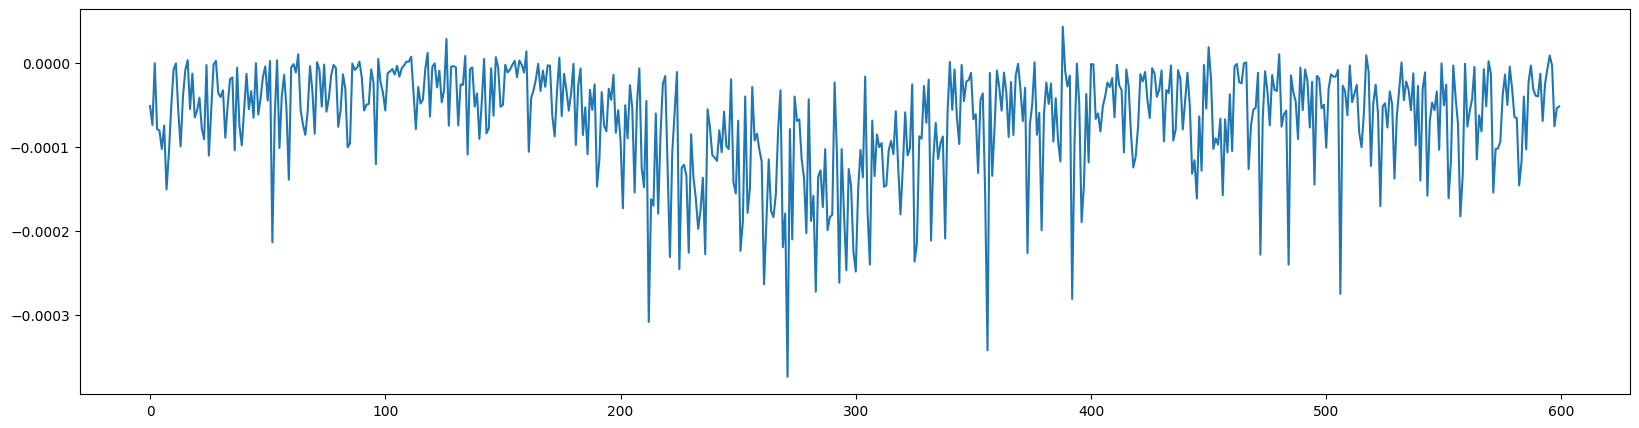

In [47]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res_oinfo[1139:].mean(axis=0))

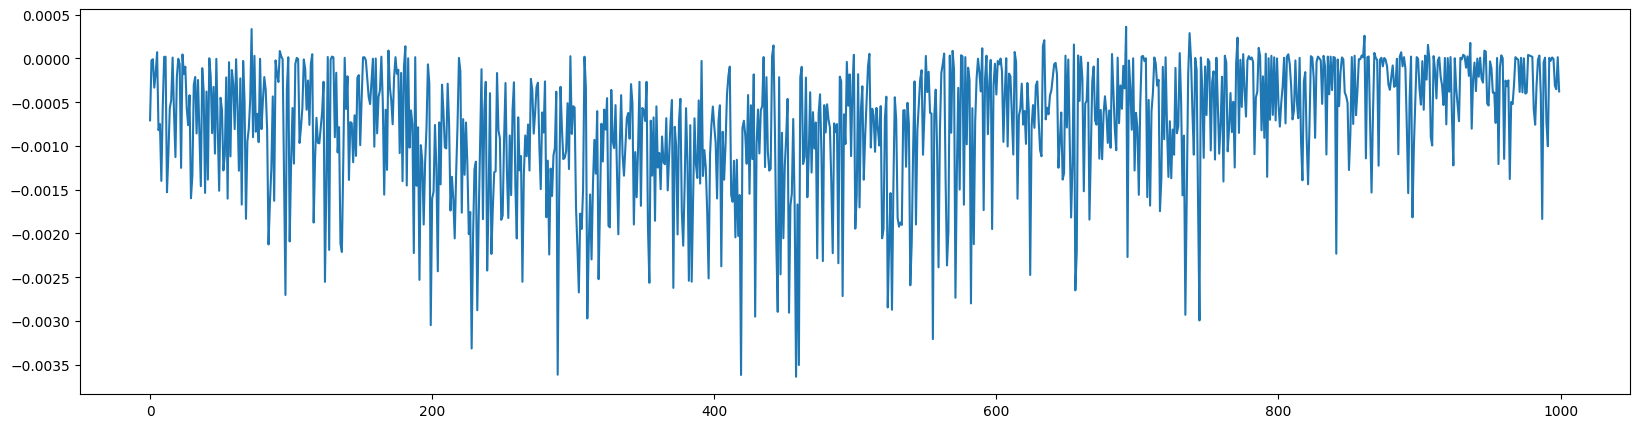

In [31]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res[:120].mean(axis=0))

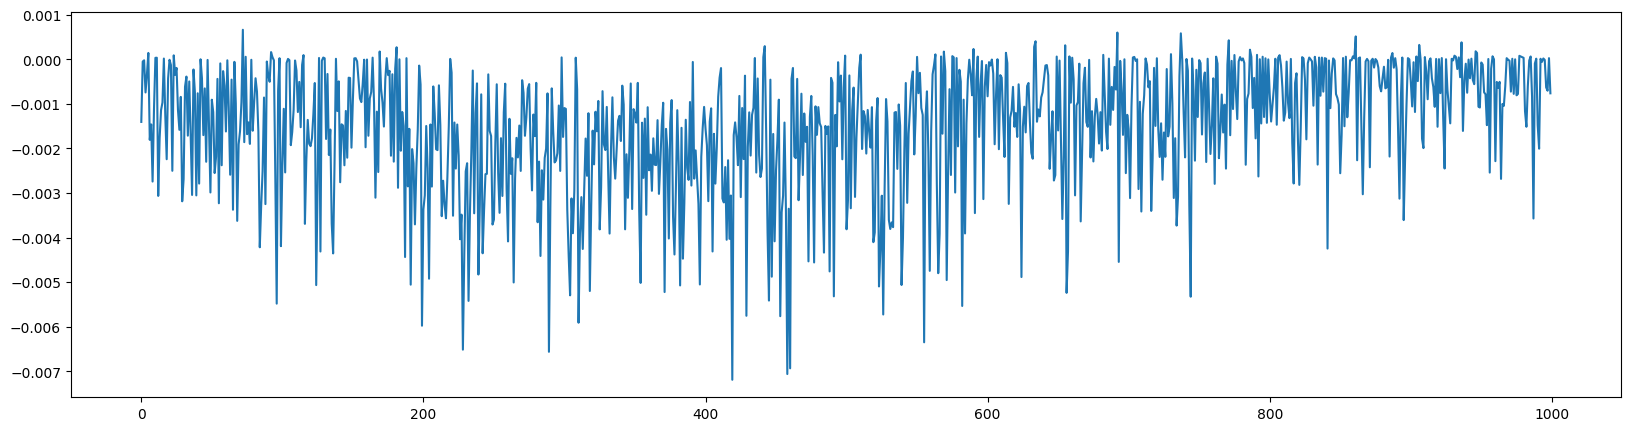

In [32]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(res[120:].mean(axis=0))